# 1. 범주형 변수

### one hot encoding

In [2]:
import os
import mglearn
import pandas as pd

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation',                          'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

#예제를 위해 7개 열만 선택
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

#Ipython.display 함수는 포맷된 출력을 display 한다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 범주형 데이터 문자열 (gender 문자열 확인

In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


gender 에 Male 과 Female 두가지로 구분되어 원 핫 인코딩 하기
에 좋은 형태이다

In [6]:
print("원본 특성: \n",list(data.columns),"\n")

#문자열이나 범주형을 가진 열을 자동으로 변환해준다
data_dummies = pd.get_dummies(data)

print("get_dummies  후의 특성: \n",list(data_dummies.columns),"\n")

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies  후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupatio

age 와 hours per week 를 제외하고는 범주형 피처 값이 새로운 피처
로 확장되었다

예) workclass -> 'workclass _?', 'workclass_Federal gov',

In [8]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

# NumPy 배열 추출
X = features.values
y = data_dummies['income_ <=50K'].values

print("X.shape : {}  y.shape : {}".format(X.shape,y.shape))

X.shape : (32561, 44)  y.shape : (32561,)


#### 로지스틱 회귀분석 사용
- 새로 인코딩한 데이터 세트를 로지스틱 회귀분석으로 테스트

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("테스트 점수 : {:.2f}".format(logreg.score(X_train,y_train)))

테스트 점수 : 0.81


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 숫자로 표현된 범주형 피처

In [14]:
demo_df = pd.DataFrame({'숫자 특성':[0, 1, 2, 1], '범주형 특성':['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [15]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


get_dummies를 사용하면 문자열 특성만 인코딩 되며 숫자 특성은 바뀌지 않는다.

- 숫자 피처도 원 핫 인코딩 가변수 으로 만들고 싶다면 열 매개변수
에 인코딩하고 싶은 열을 명시해야 한다

In [16]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)

display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 2. OneHotEncoder 와 ColumnTransformer

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


- OneHotEncoder 는 모든 열을 인코딩한다
- sparse=False 로 설정하면 OneHotEncoder 가 희소 행렬이 아닌 Numpy 배열로 반환한다
- scikit learn 의 출력은 데이터 프레임이 아니기 때문에 열 이름이 없다
- 변환된 피처에 해당하는 원본 범주형 피처 이름을 얻기 위해 get_feature_names 메서드를 사용한다

In [18]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


처음 3 개 열은 첫번째 원본의 피처이며 , 뒤의 3 개는 두번째 원본의
피처이다

### ColumnTransformer
- OneHotEncoder 는 모든 피처를 범주형이라 가정하기 때문에 바로적용할 수 없다
- ColumnTransformer 를 이용하여 입력 데이터에 있는 열마다 다른변환을 적용할 수 있다
- 연속형 피처와 범주형 피처는 매우 다른 종류의 전처리 과정이 필요하기 때문에 ColumnTransformer 가 매우 유용하다

In [19]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


- 이 데이터 세트로 선형회귀 모델을 통해 소득(income)을 예측하려면 범주형 변수에 원 핫 인코딩 적용 외에 , 연속형 변수인 age 와 hours per week 의 스케일도 조정해야 한다
- 이때 ColumnTransformer 가 필요하다

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age','hours-per-week']),
("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

#### income 을 제외한 모든 열 추출 -> data_features

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


#### 로지스틱 회귀 실행

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수:{:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수:0.81


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 데이터 스케일을 바꾸었지만 , 테스트 점수는 변화가 없다
- 하지만, 하나의 변환기 ColumnTransformer 하나로 변환시킨 장점이 있다

# 3. make_column_transformer

클래스 이름을 기반으로 각 단계에 이름을 자동으로 붙여주는 함수

In [31]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
(StandardScaler(),['age', 'hours-per-week']),
(OneHotEncoder(sparse=False),['workclass','education','gender','occupation']))

# 4.구간 분할 , 이산화 그리고 선형 모델 , 트리 모델

In [37]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

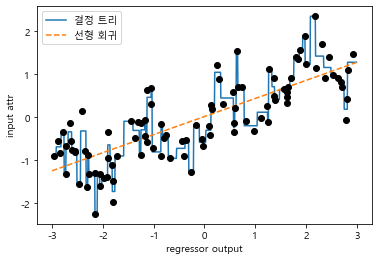

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc='best')
plt.show()


- 연속형 데이터에 아주 강력한 선형 회귀 모델을 만드는 방법 중 하나는 한 피처를 여러 피처로 나누는 구간분할 bining 이산화 이다
- KBinsDiscretizer 함수를 이용하여 다양한 구간분할이 가능하다

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges:/n", kb.bin_edges_)

bin edges:/n [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


wave 데이터 세트에 있는 연속형 피처를 각 데이터 포인트가 어느 구간에 속했는지 원 핫 인코딩한 범주형 피처로 변환한다

In [42]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned=kb.transform(X)

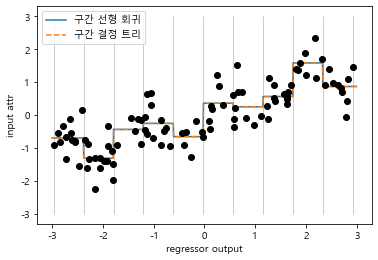

In [47]:
line_binned = kb.transform(line
                          )
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.show()


# 5.상호작용과 다항식

In [48]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


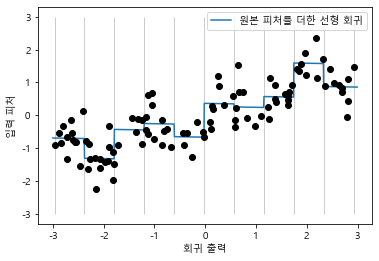

In [52]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 피처를 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)


plt.legend(loc="best")
plt.xlabel("회귀 출력")
plt.ylabel("입력 피처")
plt.plot(X[:, 0], y, 'o', c='k')

- 피처가 하나이기 때문에 기울기도 하나이다 -> 효과가 없어 보임
- x 축 사이의 상호작용을 추가할 수 있다(구간분할 피처와 원본 피처의 곱)

In [62]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


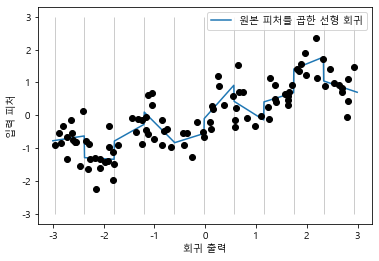

In [64]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 피처를 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)


plt.legend(loc="best")
plt.xlabel("회귀 출력")
plt.ylabel("입력 피처")
plt.plot(X[:, 0], y, 'o', c='k')

- 피처가 20 개로 증가
- 곱셈 피처는 각 구간에 대한 x 축 피처의 복사본으로 생각(각 구간 안에서 원본 피처이고 다른 곳에서는 0)

#### 원본 피처에 다항식 추가 방법

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [66]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


#### X 와 X_ploy 값 비교

In [67]:
print("X 원소:\n{}".format(X[:5]))

print("X_poly 원소:\n{}".format(X_poly[:5]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


각 피처의 차수를 알려주는 get_feature_names 메서드 사용

In [68]:
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


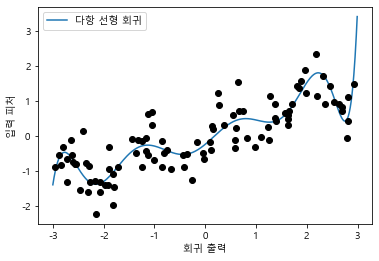

In [69]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("회귀 출력")
plt.ylabel("입력 피처")
plt.legend(loc="best")
plt.show()

#### 원본 데이터에 커널 SVM 모델을 학습시켰다

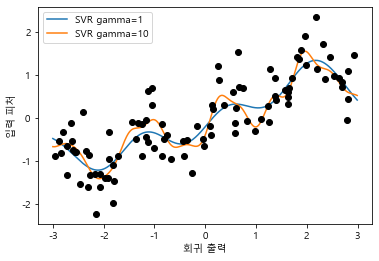

In [71]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("회귀 출력")
plt.ylabel("입력 피처")
plt.legend(loc="best")
plt.show()

SVM 은 다항식과 유사한 곡선

In [72]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 이 데이터는 원래 피처가 13 개인데 105 개 교차 피처로 확장되었다
- 새로운 피처는 원래 피처의 제곱과 가능한 두 피처의 조합을 모두 포함한다 (degree=2 사용)
- 어떤 원본 피처가 곱해져 새 피처가 만들어졌는지 확인하기 위해서는 get_feature_names 메서드를 사용한다

#### 상호작용 피처가 있는 데이터와 없는 데이터를 Ridge 를 사용해 비교

In [73]:
from  sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


상호작용과 다항식 피처가 Ridge 성능을 높혔다

#### 랜덤 포레스트를 사용한 경우

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


상호작용을 추가하면 , 성능이 다소 떨어진다 . 이유는 모델이 복잡하기 때문이다

# 6.피처 자동 선택

In [80]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성 추가
# 처음 30 개는 원본이고 다음 50개는 노이즈로 구성
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: ",X_train.shape)
print("X_train_selected.shape: ",X_train_selected.shape)

X_train.shape:  (284, 80)
X_train_selected.shape:  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


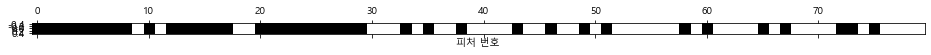

In [81]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("피처 번호")
plt.show()

- 대부분 30 번 미만이 검은색으로 원본 피처가 선택되었다
- 하지만 , 완벽하게 복원되지 않았다

#### 전체 피처와 선택된 피처만 사용했을 때 , 로지스틱 회귀 성능 비교

In [83]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test) 

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 피처를 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))

# 전체 특성을 사용한 점수: 0.930
lr.fit(X_train_selected, y_train)
print("선택된 일부 피처를 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 피처를 사용한 점수: 0.919
선택된 일부 피처를 사용한 점수: 0.909


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

- 노이즈를 제거한 쪽 성능이 높다
- 하지만 실제 사회에서는 다를 수도 있다

#### 모델 기반 피처 선택

#### SelectFromModel

In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [86]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train_shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train_shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


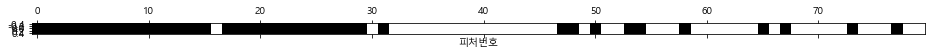

In [90]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("피처번호")
plt.show()

이번에는 원본에서 2 개를 제외하고 모든 원본 피처가 선택되었다

In [88]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.930


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 반복적 피처 선택

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


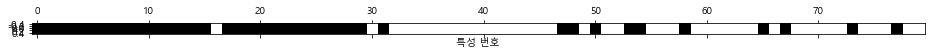

In [89]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("피처 번호")
plt.show()

여전히 피처 1 개를 놓쳤다

#### RFE 를 사용해서 피처를 선택했을 때 , 로지스틱 회귀 모델의 정확도

In [91]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test) 

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.930


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### RFE 에 사용된 모델을 이용한 예측 이 경우 선택된 피처만 사용

In [93]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951
